In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
def read(file):
    df = pd.read_csv(file, index_col=0, parse_dates=True)
    return df

In [4]:
df_confirmed = read('../data/confirmed.csv')
df_deaths = read('../data/deaths.csv')
df_suspected = read('../data/suspected.csv')
df_negative = read('../data/negatives.csv')

In [6]:
df_confirmed.columns

Index(['poblacion', 'nombre', '26-02-2020', '27-02-2020', '28-02-2020',
       '29-02-2020', '01-03-2020', '02-03-2020', '03-03-2020', '04-03-2020',
       ...
       '07-03-2023', '08-03-2023', '09-03-2023', '10-03-2023', '11-03-2023',
       '12-03-2023', '13-03-2023', '14-03-2023', '15-03-2023', '16-03-2023'],
      dtype='object', length=1117)

In [7]:
df_deaths.columns

Index(['poblacion', 'nombre', '17-03-2020', '18-03-2020', '19-03-2020',
       '20-03-2020', '21-03-2020', '22-03-2020', '23-03-2020', '24-03-2020',
       ...
       '06-03-2023', '07-03-2023', '08-03-2023', '09-03-2023', '10-03-2023',
       '11-03-2023', '12-03-2023', '13-03-2023', '14-03-2023', '15-03-2023'],
      dtype='object', length=1096)

In [8]:
df_suspected.columns

Index(['poblacion', 'nombre', '31-12-2019', '01-01-2020', '02-01-2020',
       '03-01-2020', '04-01-2020', '05-01-2020', '06-01-2020', '07-01-2020',
       ...
       '06-03-2023', '07-03-2023', '08-03-2023', '09-03-2023', '10-03-2023',
       '11-03-2023', '12-03-2023', '13-03-2023', '14-03-2023', '15-03-2023'],
      dtype='object', length=1173)

In [9]:
df_negative.columns

Index(['poblacion', 'nombre', '31-12-2019', '01-01-2020', '02-01-2020',
       '03-01-2020', '04-01-2020', '05-01-2020', '06-01-2020', '07-01-2020',
       ...
       '06-03-2023', '07-03-2023', '08-03-2023', '09-03-2023', '10-03-2023',
       '11-03-2023', '12-03-2023', '13-03-2023', '14-03-2023', '15-03-2023'],
      dtype='object', length=1173)

In [15]:
df_confirmed = df_confirmed.set_index('nombre')
df_deaths = df_deaths.set_index('nombre')
df_suspected = df_suspected.set_index('nombre')
df_negative = df_negative.set_index('nombre')

# Population of top 10 cities in Mexico

Text(0.5, 1.0, 'Population of top 10 cities')

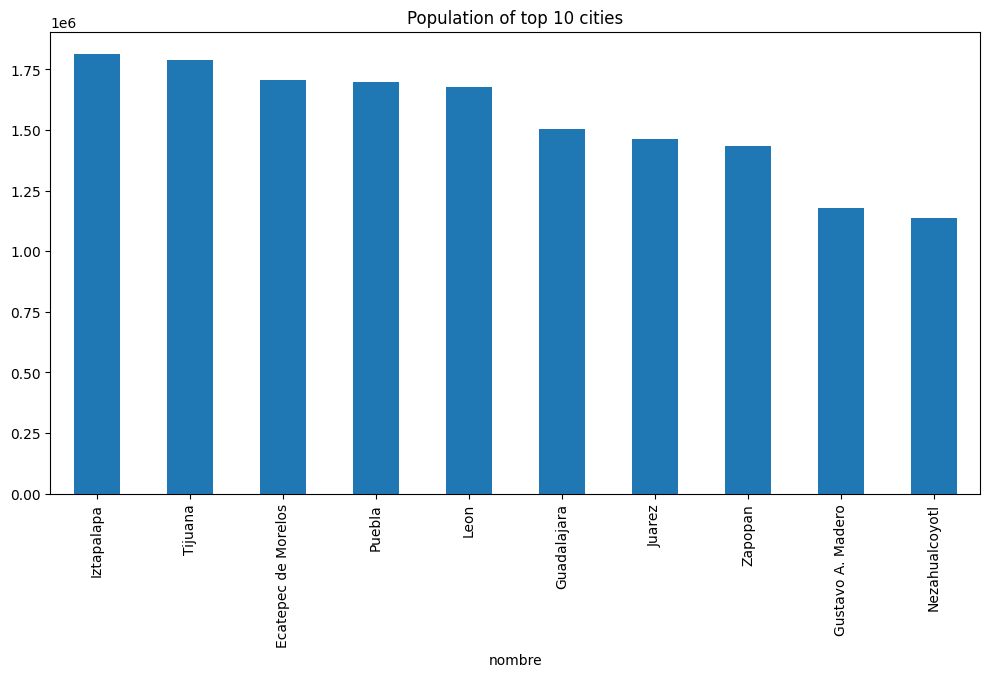

In [17]:
plt.figure(figsize=(12, 6))
df_confirmed['poblacion'].sort_values(ascending=False).head(10).plot(kind='bar', figsize=(12, 6))
plt.title('Population of top 10 cities')


In [27]:
df_confirmed['total'] = df_confirmed.iloc[:, 1:].sum(axis=1)
df_deaths['total'] = df_deaths.iloc[:, 1:].sum(axis=1)
df_suspected['total'] = df_suspected.iloc[:, 1:].sum(axis=1)
df_negative['total'] = df_negative.iloc[:, 1:].sum(axis=1)


# Plotting the top 10 cities with highest number of confirmed cases total till date

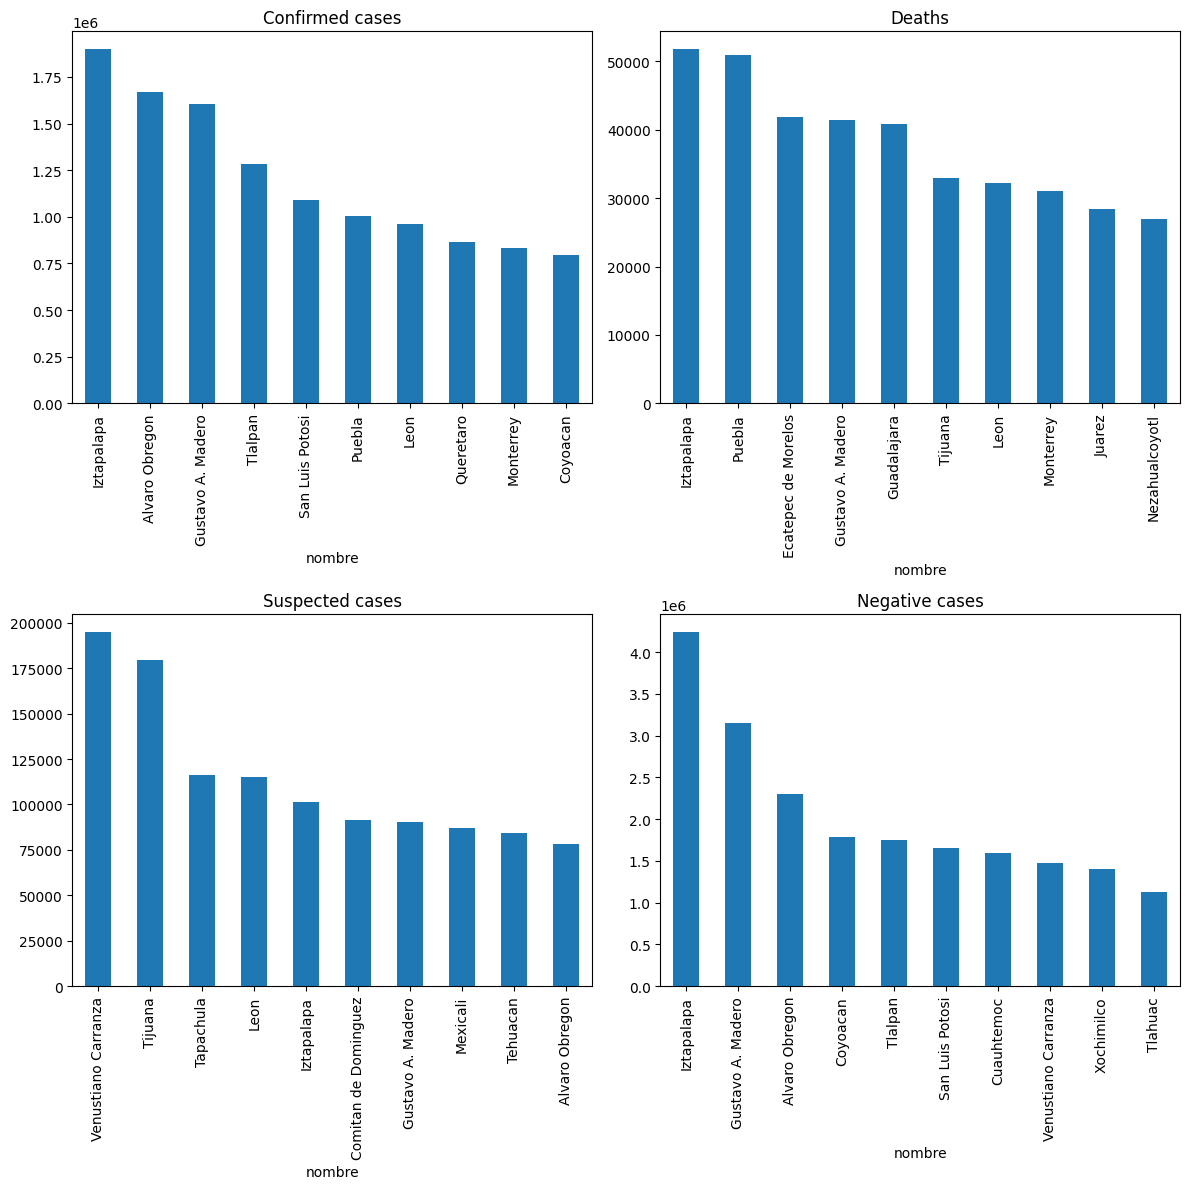

In [30]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))
df_confirmed['total'].sort_values(ascending=False).head(10).plot(kind='bar', ax=ax1)
ax1.set_title('Confirmed cases')
df_deaths['total'].sort_values(ascending=False).head(10).plot(kind='bar', ax=ax2)
ax2.set_title('Deaths')
df_suspected['total'].sort_values(ascending=False).head(10).plot(kind='bar', ax=ax3)
ax3.set_title('Suspected cases')
df_negative['total'].sort_values(ascending=False).head(10).plot(kind='bar', ax=ax4)
ax4.set_title('Negative cases')
plt.tight_layout()
plt.show()

In [31]:
top_10_confirmed = df_confirmed['total'].sort_values(ascending=False).head(10).index
top_10_deaths = df_deaths['total'].sort_values(ascending=False).head(10).index
top_10_suspected = df_suspected['total'].sort_values(ascending=False).head(10).index
top_10_negative = df_negative['total'].sort_values(ascending=False).head(10).index

In [33]:
## dropping the total column
df_confirmed.drop('total', axis=1, inplace=True)
df_deaths.drop('total', axis=1, inplace=True)
df_suspected.drop('total', axis=1, inplace=True)
df_negative.drop('total', axis=1, inplace=True)

In [34]:
def cumulative_sum(df):
    result_df = df.copy()
    a = result_df.iloc[2:, 1:]
    for i in range(1, len(a.columns)):
        a.iloc[:, i] = a.iloc[:, i] + a.iloc[:, i-1]
    return a

df_confirmed_cum = cumulative_sum(df_confirmed)
df_deaths_cum = cumulative_sum(df_deaths)
df_suspected_cum = cumulative_sum(df_suspected)
df_negative_cum = cumulative_sum(df_negative)

# plotting the time-series data for the top-10 cities for each category


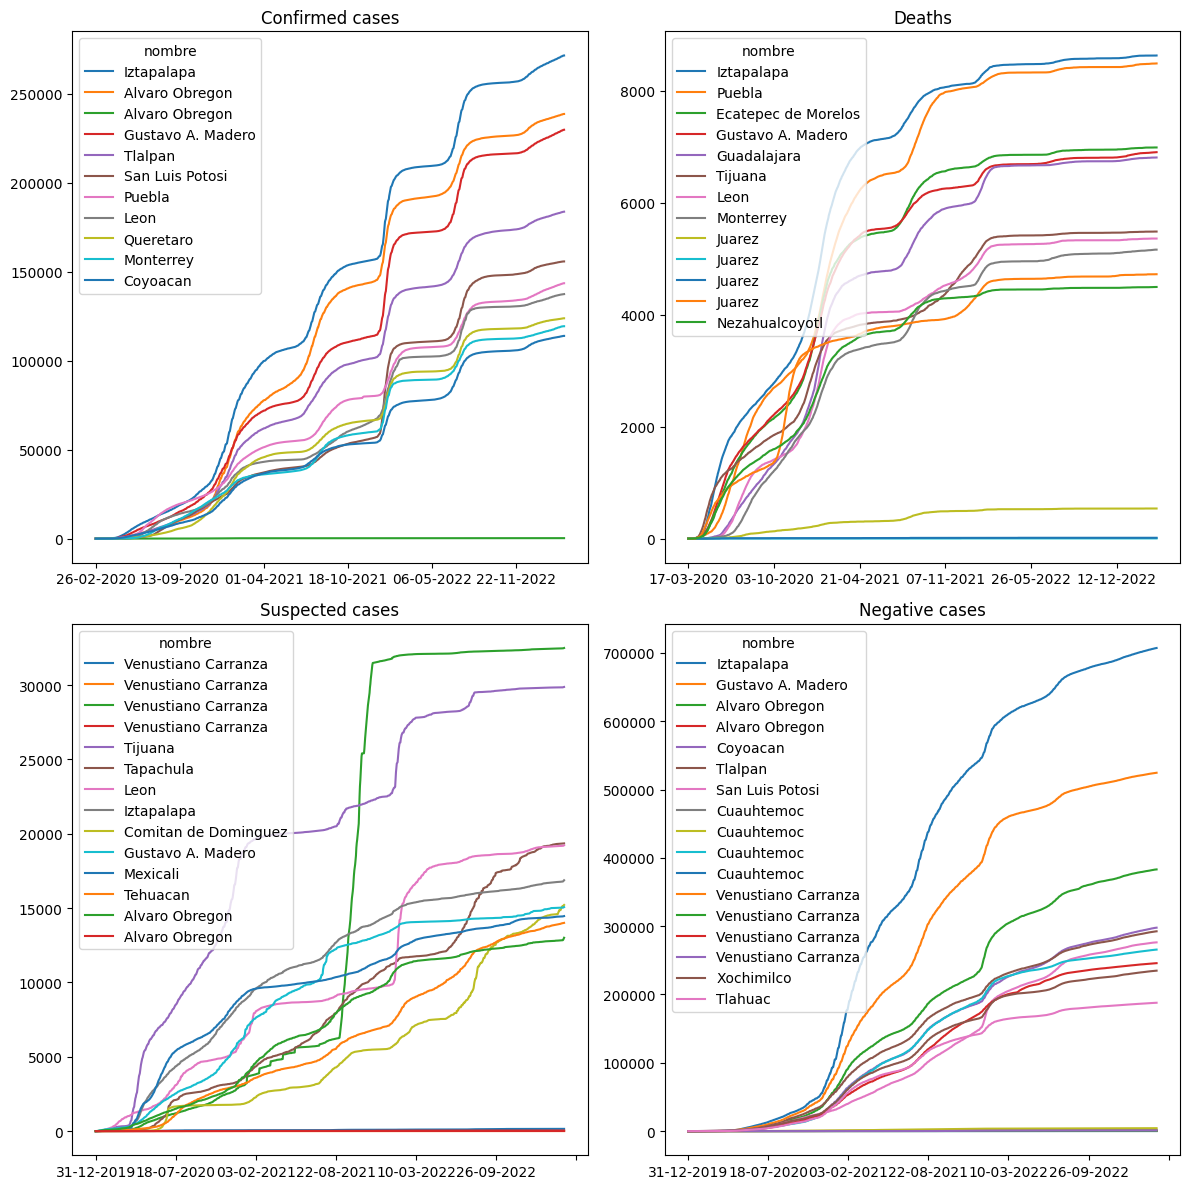

In [35]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))
df_confirmed_cum.loc[top_10_confirmed].T.plot(ax=ax1)
ax1.set_title('Confirmed cases')
df_deaths_cum.loc[top_10_deaths].T.plot(ax=ax2)
ax2.set_title('Deaths')
df_suspected_cum.loc[top_10_suspected].T.plot(ax=ax3)
ax3.set_title('Suspected cases')
df_negative_cum.loc[top_10_negative].T.plot(ax=ax4)
ax4.set_title('Negative cases')
plt.tight_layout()
plt.show()

In [36]:
df_confirmed_cum.head()

,26-02-2020,27-02-2020,28-02-2020,29-02-2020,01-03-2020,02-03-2020,03-03-2020,04-03-2020,05-03-2020,06-03-2020,...,07-03-2023,08-03-2023,09-03-2023,10-03-2023,11-03-2023,12-03-2023,13-03-2023,14-03-2023,15-03-2023,16-03-2023
nombre,,,,,,,,,,,,,,,,,,,,,
Lagunillas,0,0,0,0,0,0,0,0,0,0,...,62,62,62,62,62,62,62,62,62,62
Madero,0,0,0,0,0,0,0,0,0,0,...,137,137,137,137,137,137,137,137,137,137
Torreon,0,0,1,1,1,1,1,1,1,1,...,37994,38002,38023,38039,38043,38047,38065,38076,38087,38087
Viesca,0,0,0,0,0,0,0,0,0,0,...,202,202,202,202,202,202,202,202,202,202
Berriozabal,0,0,0,0,0,0,0,0,0,0,...,417,417,417,417,417,417,417,417,417,417


In [38]:
## summing up all the cities for each category

df_confirmed_cum = df_confirmed_cum.sum(axis=0)
df_deaths_cum = df_deaths_cum.sum(axis=0)
df_suspected_cum = df_suspected_cum.sum(axis=0)
df_negative_cum = df_negative_cum.sum(axis=0)


In [41]:
## converting the series to a dataframe

df_confirmed_cum = pd.DataFrame(df_confirmed_cum, columns=['confirmed'])
df_deaths_cum = pd.DataFrame(df_deaths_cum, columns=['deaths'])
df_suspected_cum = pd.DataFrame(df_suspected_cum, columns=['suspected'])
df_negative_cum = pd.DataFrame(df_negative_cum, columns=['negative'])

In [46]:
df_confirmed_cum.index = pd.to_datetime(df_confirmed_cum.index, format='%d-%m-%Y')
df_deaths_cum.index = pd.to_datetime(df_deaths_cum.index, format='%d-%m-%Y')
df_suspected_cum.index = pd.to_datetime(df_suspected_cum.index, format='%d-%m-%Y')
df_negative_cum.index = pd.to_datetime(df_negative_cum.index, format='%d-%m-%Y')

# splitting the time series data using Time-series decompositon


In [48]:

from statsmodels.tsa.seasonal import seasonal_decompose

def decompose(df):
    result = seasonal_decompose(df, model='additive')
    return result

result_confirmed = decompose(df_confirmed_cum)
result_deaths = decompose(df_deaths_cum)
result_suspected = decompose(df_suspected_cum)
result_negative = decompose(df_negative_cum)

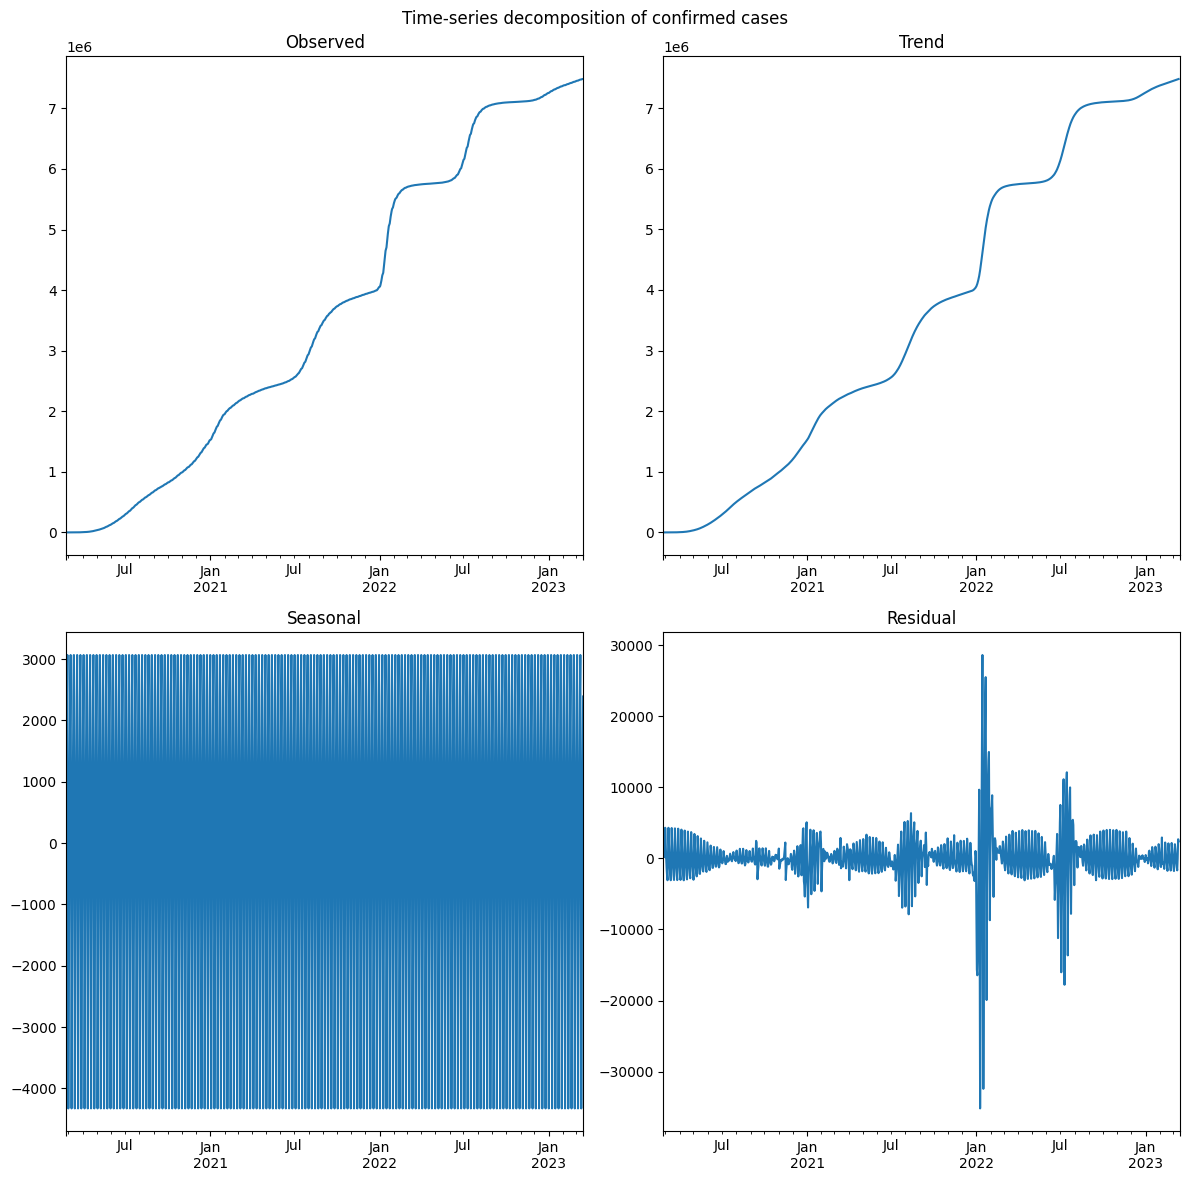

In [52]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))
plt.suptitle('Time-series decomposition of confirmed cases')
result_confirmed.observed.plot(ax=ax1)
ax1.set_title('Observed')
result_confirmed.trend.plot(ax=ax2)
ax2.set_title('Trend')
result_confirmed.seasonal.plot(ax=ax3)
ax3.set_title('Seasonal')
result_confirmed.resid.plot(ax=ax4)
ax4.set_title('Residual')
plt.tight_layout()
plt.show()

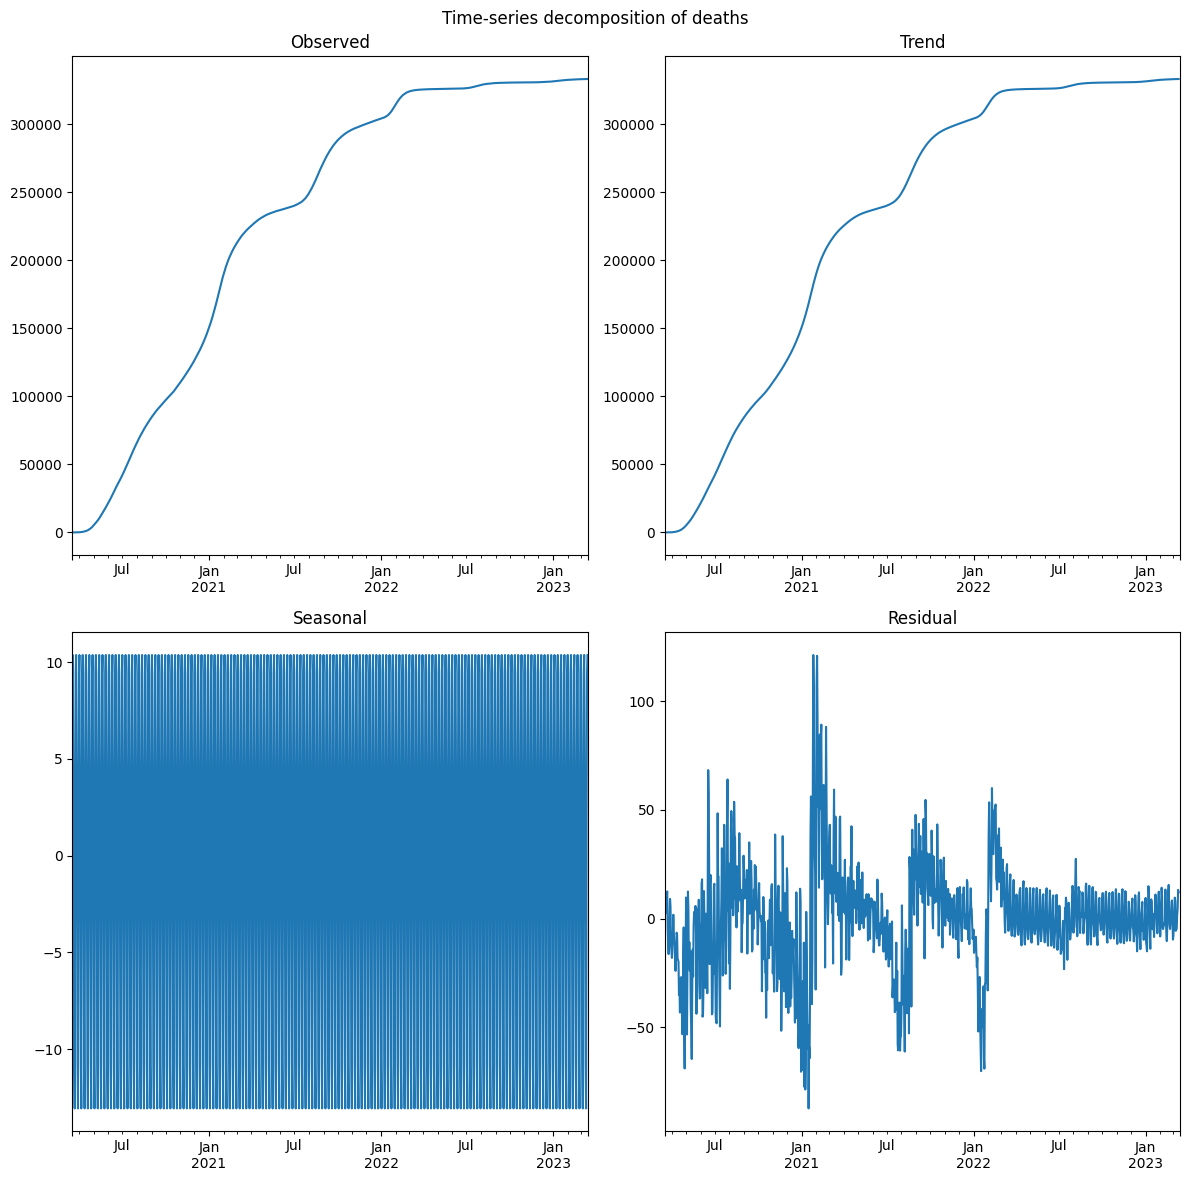

In [53]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))
plt.suptitle('Time-series decomposition of deaths')
result_deaths.observed.plot(ax=ax1)
ax1.set_title('Observed')
result_deaths.trend.plot(ax=ax2)
ax2.set_title('Trend')
result_deaths.seasonal.plot(ax=ax3)
ax3.set_title('Seasonal')
result_deaths.resid.plot(ax=ax4)
ax4.set_title('Residual')
plt.tight_layout()
plt.show()

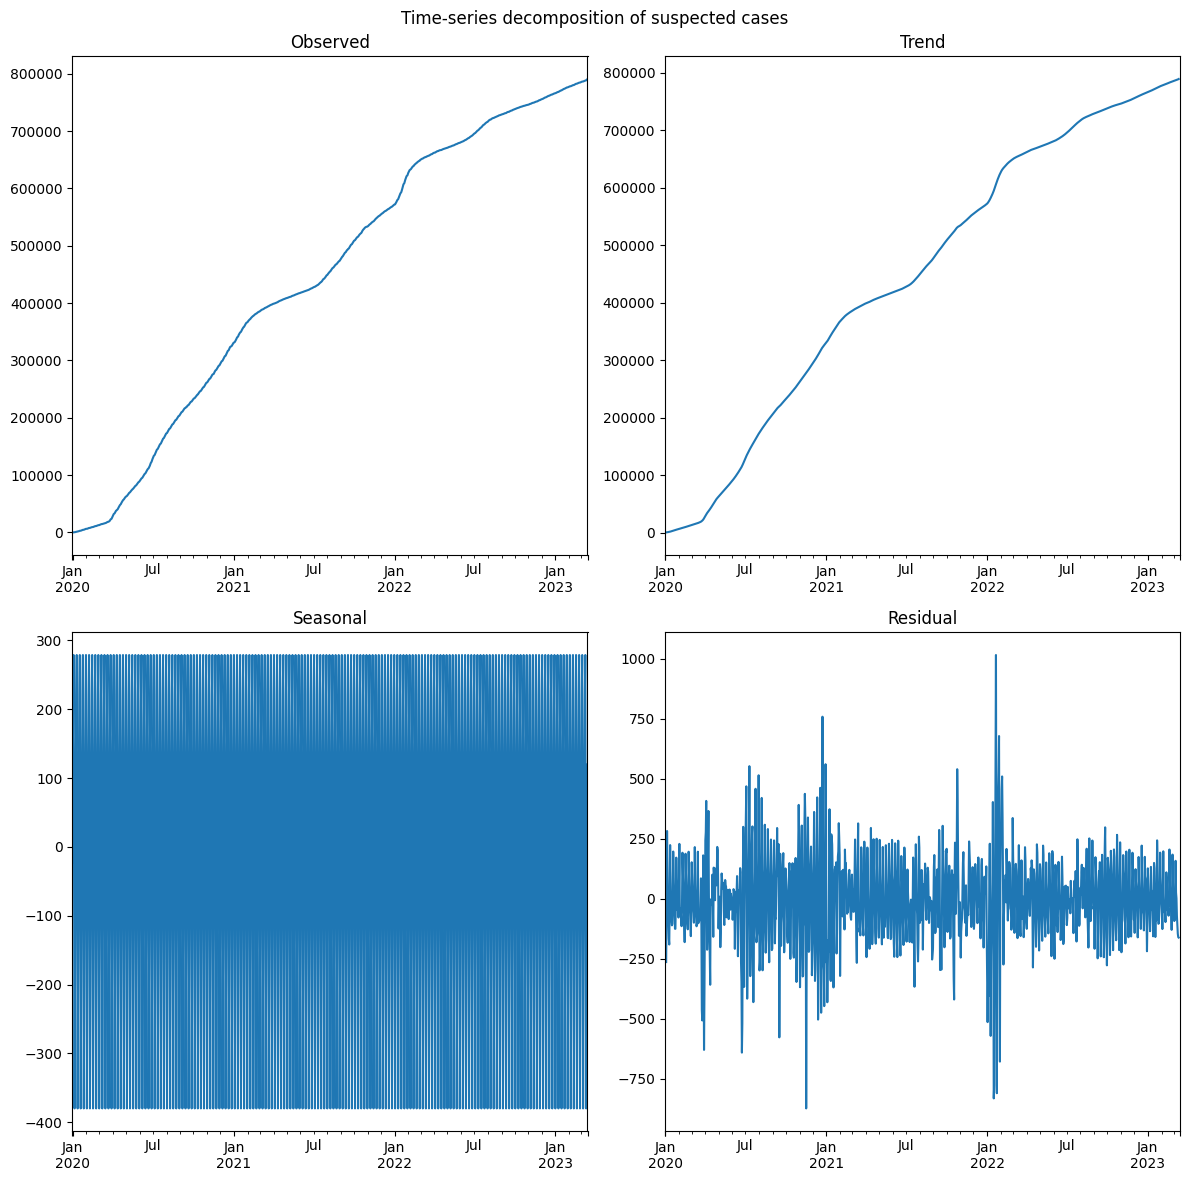

In [54]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))
plt.suptitle('Time-series decomposition of suspected cases')
result_suspected.observed.plot(ax=ax1)
ax1.set_title('Observed')
result_suspected.trend.plot(ax=ax2)
ax2.set_title('Trend')
result_suspected.seasonal.plot(ax=ax3)
ax3.set_title('Seasonal')
result_suspected.resid.plot(ax=ax4)
ax4.set_title('Residual')
plt.tight_layout()
plt.show()

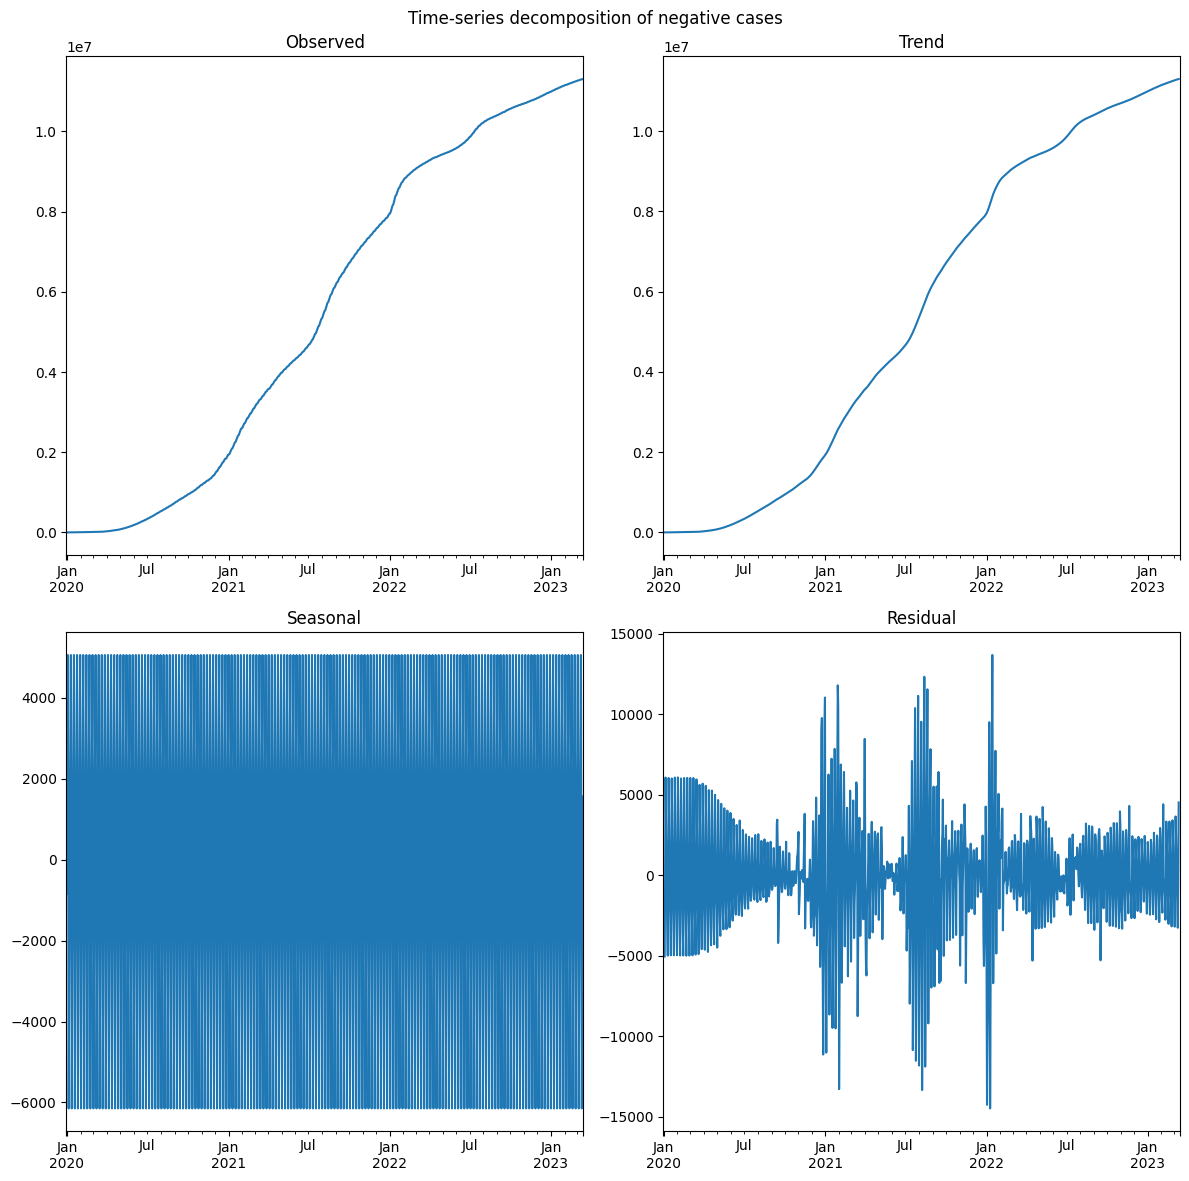

In [55]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))
plt.suptitle('Time-series decomposition of negative cases')
result_negative.observed.plot(ax=ax1)
ax1.set_title('Observed')
result_negative.trend.plot(ax=ax2)
ax2.set_title('Trend')
result_negative.seasonal.plot(ax=ax3)
ax3.set_title('Seasonal')
result_negative.resid.plot(ax=ax4)
ax4.set_title('Residual')
plt.tight_layout()
plt.show()

# Stationarity test using Augmented Dickey-Fuller test And Trend Analysis using Regression 

In [68]:

from statsmodels.tsa.stattools import adfuller

def adf_test(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

In [60]:
## Trend Analysis
from sklearn.linear_model import LinearRegression

def trend_analysis(df):
    X = np.arange(len(df)).reshape(-1, 1)
    y = df.values
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)
    return y_pred

In [69]:
adf_test(df_confirmed_cum)

Results of Dickey-Fuller Test:
Test Statistic                   -0.589692
p-value                           0.873294
#Lags Used                       16.000000
Number of Observations Used    1098.000000
Critical Value (1%)              -3.436320
Critical Value (5%)              -2.864176
Critical Value (10%)             -2.568173
dtype: float64


#### The test statistic is less than the critical value at the 1%, 5%, and 10% levels. This indicates that there is not enough evidence to reject the null hypothesis of non-stationarity. The p-value is greater than the significance level of 0.05. This indicates that there is not enough evidence to reject the null hypothesis of non-stationarity. Overall, the results suggest that the time series is non-stationary, which means that it has a trend and/or seasonality component that needs to be addressed before any further analysis. This could involve using techniques such as differencing or seasonal decomposition to remove the non-stationarity and make the time series stationary.

In [61]:
y_pred_confirmed = trend_analysis(df_confirmed_cum)

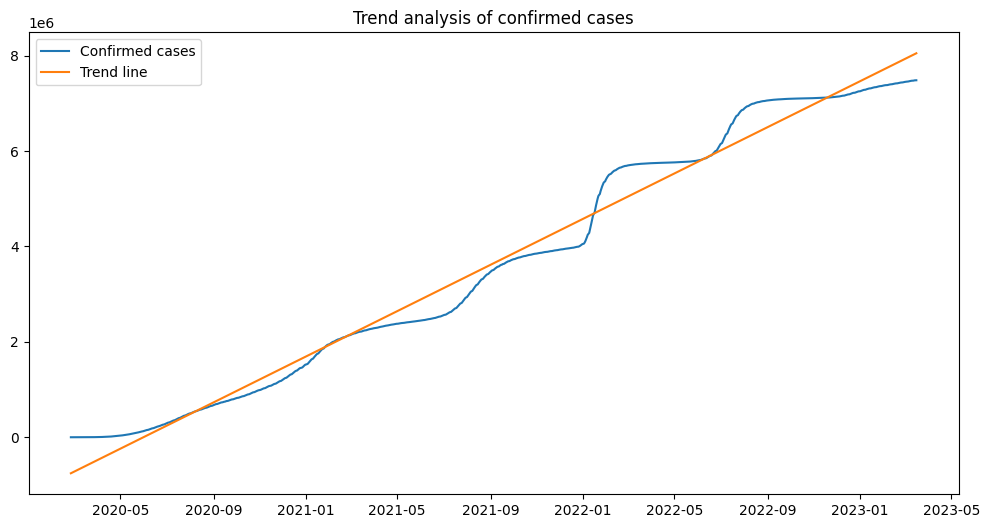

In [63]:
## plotting the trend line

plt.figure(figsize=(12, 6))
plt.plot(df_confirmed_cum.index, df_confirmed_cum.values, label='Confirmed cases')
plt.plot(df_confirmed_cum.index, y_pred_confirmed, label='Trend line')
plt.title('Trend analysis of confirmed cases')
plt.legend()
plt.show()

In [70]:
adf_test(df_deaths_cum)

Results of Dickey-Fuller Test:
Test Statistic                   -3.477782
p-value                           0.008576
#Lags Used                       21.000000
Number of Observations Used    1072.000000
Critical Value (1%)              -3.436465
Critical Value (5%)              -2.864240
Critical Value (10%)             -2.568208
dtype: float64


#### The test statistic is less than the critical value at the 1%, 5%, and 10% levels. This indicates that there is enough evidence to say that the time series is likely stationary. Also, The p-value is less than the significance level of 0.05. This also indicates that there is enough evidence to reject the null hypothesis of non-stationarity. Overall, the results suggest that the time series is stationary, which means that it does not have a trend or seasonality component that needs to be addressed before further analysis. This is a good starting point for analyzing the time series using various techniques such as forecasting, regression, or machine learning. 
### **But Stationarity is a strong assumption and should be tested for.**

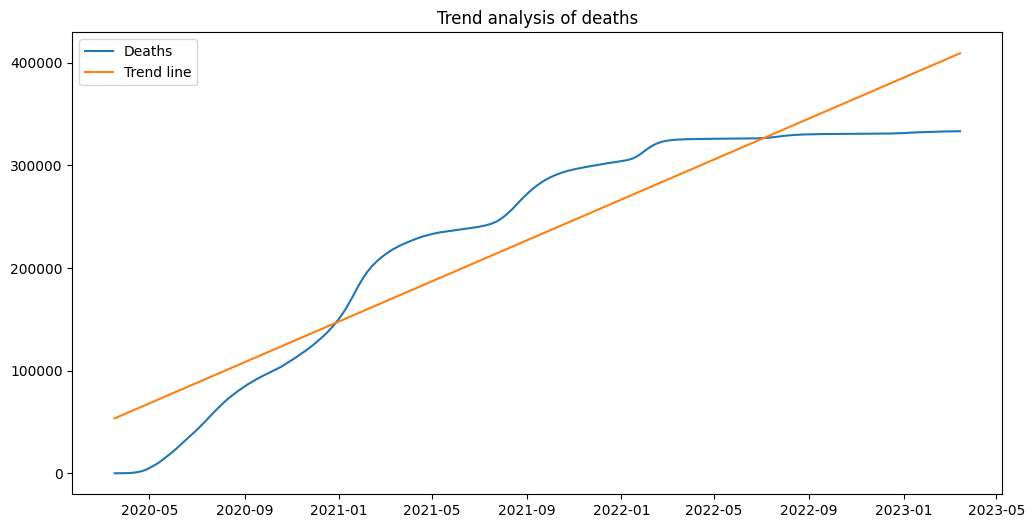

In [64]:
y_pred_deaths = trend_analysis(df_deaths_cum)

## plotting the trend line
plt.figure(figsize=(12, 6))
plt.plot(df_deaths_cum.index, df_deaths_cum.values, label='Deaths')
plt.plot(df_deaths_cum.index, y_pred_deaths, label='Trend line')
plt.title('Trend analysis of deaths')
plt.legend()
plt.show()

#### as suspected, the deaths curve is not stationary, although after january 2022, it became stationary.(For more than one year, there are nominal case of death from covid-19)

In [71]:
adf_test(df_suspected_cum)

Results of Dickey-Fuller Test:
Test Statistic                   -2.217141
p-value                           0.200083
#Lags Used                       22.000000
Number of Observations Used    1148.000000
Critical Value (1%)              -3.436059
Critical Value (5%)              -2.864061
Critical Value (10%)             -2.568112
dtype: float64


#### The test statistic is greater than the critical value at the 10% level but less than the critical values at the 5% and 1% levels. This indicates that there is not enough evidence to reject the null hypothesis of non-stationarity at the 5% and 1% significance levels, but there may be enough evidence to reject the null hypothesis at the 10% level. The p-value is greater than the significance level of 0.05. This indicates that there is not enough evidence to reject the null hypothesis of non-stationarity at the 5% significance level. Overall, the results suggest that there is not enough evidence to conclude that the time series is stationary. There may be a trend or seasonality component in the data that needs to be addressed before further analysis. You may need to try different techniques such as differencing, seasonal decomposition, or other methods to make the time series stationary.

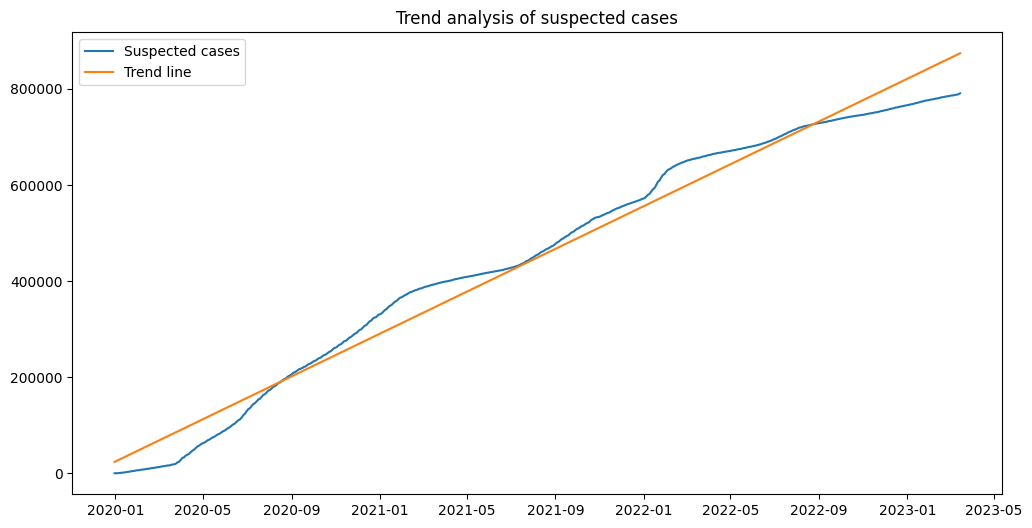

In [65]:
y_pred_suspected = trend_analysis(df_suspected_cum)

## plotting the trend line
plt.figure(figsize=(12, 6))
plt.plot(df_suspected_cum.index, df_suspected_cum.values, label='Suspected cases')
plt.plot(df_suspected_cum.index, y_pred_suspected, label='Trend line')
plt.title('Trend analysis of suspected cases')
plt.legend()
plt.show()

In [72]:
adf_test(df_negative_cum)

Results of Dickey-Fuller Test:
Test Statistic                   -0.817314
p-value                           0.813983
#Lags Used                       22.000000
Number of Observations Used    1148.000000
Critical Value (1%)              -3.436059
Critical Value (5%)              -2.864061
Critical Value (10%)             -2.568112
dtype: float64


#### The test statistic is greater than the critical values at the 1%, 5%, and 10% levels. This indicates that there is not enough evidence to reject the null hypothesis of non-stationarity at any significance level. The p-value is greater than the significance level of 0.05. This indicates that there is not enough evidence to reject the null hypothesis of non-stationarity at the 5% significance level. Overall, the results suggest that there is not enough evidence to conclude that the time series is stationary. There may be a trend or seasonality component in the data that needs to be addressed before further analysis. You may need to try different techniques such as differencing, seasonal decomposition, or other methods to make the time series stationary.

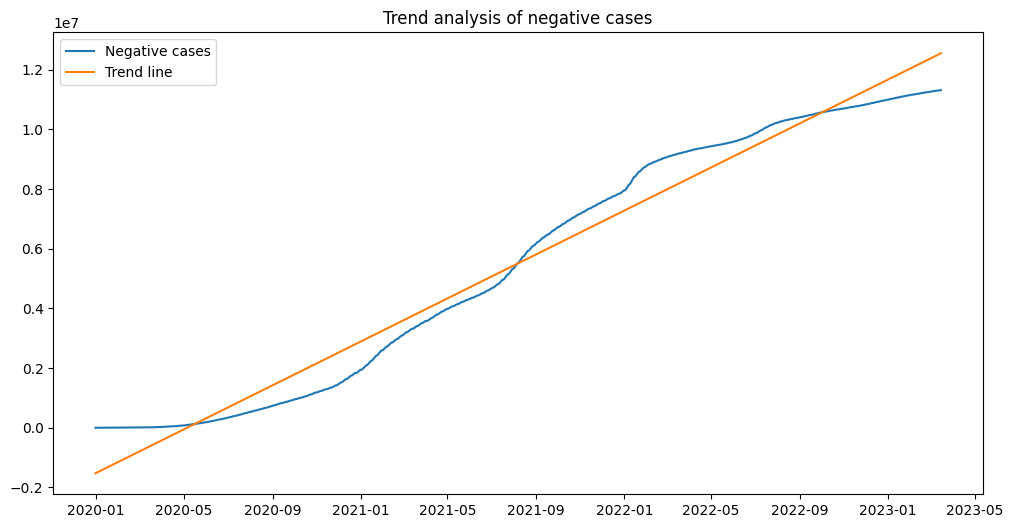

In [66]:
y_pred_negative = trend_analysis(df_negative_cum)

## plotting the trend line
plt.figure(figsize=(12, 6))
plt.plot(df_negative_cum.index, df_negative_cum.values, label='Negative cases')
plt.plot(df_negative_cum.index, y_pred_negative, label='Trend line')
plt.title('Trend analysis of negative cases')
plt.legend()
plt.show()

# Seasonal Decomposition for the confirmed, suspected and negative cases

In [91]:
from statsmodels.tsa.seasonal import seasonal_decompose

def decompose(df, period=31):
    result = seasonal_decompose(df, model='additive', period = period) ## period=31 for monthly data
    return result

## Confirmed Cases

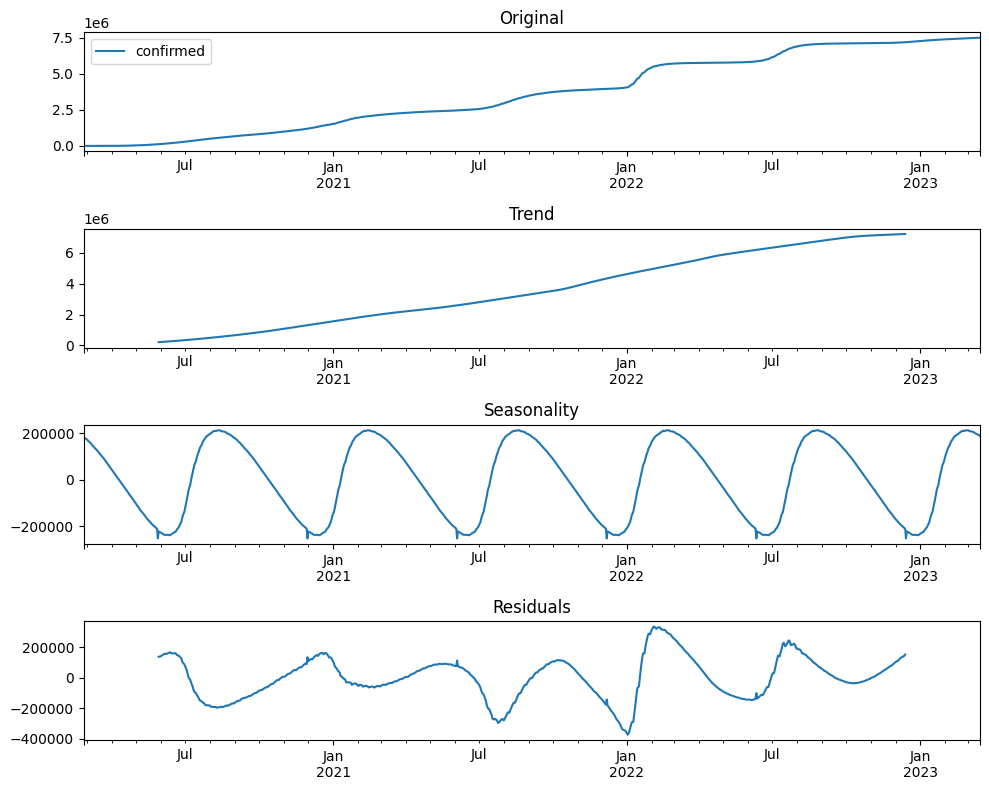

In [94]:
trend = decompose(df_confirmed_cum, 186).trend
seasonal = decompose(df_confirmed_cum, 186).seasonal
residual = decompose(df_confirmed_cum, 186).resid

fig, ax = plt.subplots(4, 1, figsize=(10, 8))
df_confirmed_cum.plot(ax=ax[0], title='Original')
trend.plot(ax=ax[1], title='Trend')
seasonal.plot(ax=ax[2], title='Seasonality')
residual.plot(ax=ax[3], title='Residuals')
plt.tight_layout()
plt.show()

#### When the period was defined as 7 days or a month we observed a zig-zag pattern, The zig-zag pattern could suggest that the data is highly volatile or subject to fluctuations that occur irregularly across time. In this case, a seasonal decomposition may not yield meaningful results, and other approaches may need to be explored to identify trends or patterns in the data. When the period was taken to be 186 or 6 months we can see that the trend is increasing and the seasonality being smoothened out. This could suggest that the data is subject to seasonal fluctuations that occur regularly across time. In this case, a seasonal decomposition may yield meaningful results, and other approaches may need to be explored to identify trends or patterns in the data. We can also infer that covid-19 cases hit during a particular season and the cases are more during that season. As a common inference it was also concluded that the cases are more during the winter season. and the cases are less during the summer season. which can be seen in the graph above.

## Suspected Cases

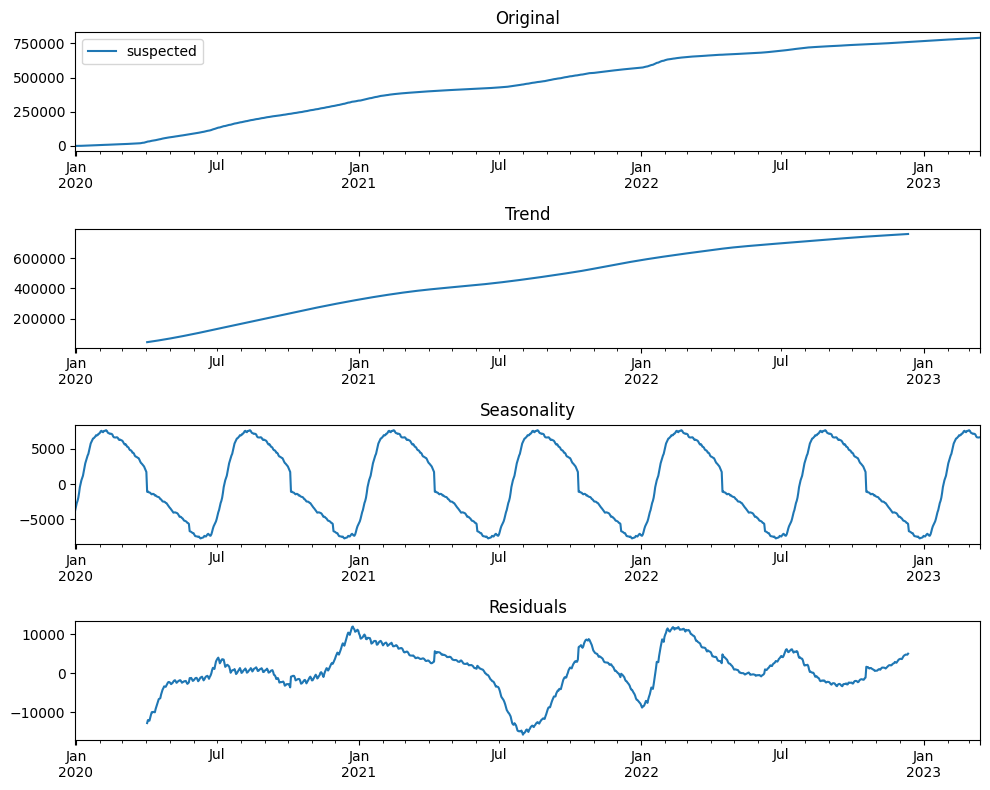

In [95]:
trend = decompose(df_suspected_cum, 186).trend
seasonal = decompose(df_suspected_cum, 186).seasonal
residual = decompose(df_suspected_cum, 186).resid

fig, ax = plt.subplots(4, 1, figsize=(10, 8))
df_suspected_cum.plot(ax=ax[0], title='Original')
trend.plot(ax=ax[1], title='Trend')
seasonal.plot(ax=ax[2], title='Seasonality')
residual.plot(ax=ax[3], title='Residuals')
plt.tight_layout()
plt.show()

#### Somewhat similar pattern can be seen over here in the suspected cases. This is very similar to that of the confirmed cases. The only difference is that the suspected cases are less than the confirmed cases. This could be because the suspected cases are not confirmed and hence the number of suspected cases are less than the confirmed cases. The trend is increasing and the seasonality being smoothened out. This could suggest that the data is subject to seasonal fluctuations that occur regularly across time. In this case, a seasonal decomposition may yield meaningful results, and other approaches may need to be explored to identify trends or patterns in the data. We can also infer that covid-19 cases hit during a particular season and the cases are more during that season. As a common inference it was also concluded that the cases are more during the winter season. and the cases are less during the summer season. which can be seen in the graph above.

## Negative Cases

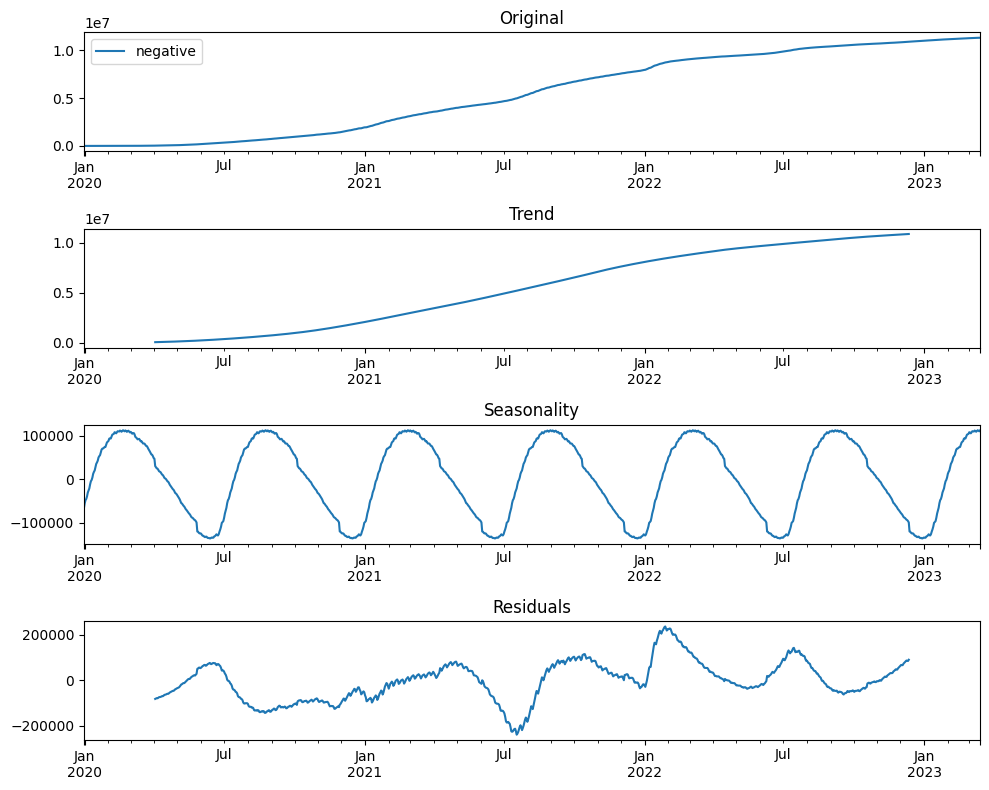

In [96]:
trend = decompose(df_negative_cum, 186).trend
seasonal = decompose(df_negative_cum, 186).seasonal
residual = decompose(df_negative_cum, 186).resid

fig, ax = plt.subplots(4, 1, figsize=(10, 8))
df_negative_cum.plot(ax=ax[0], title='Original')
trend.plot(ax=ax[1], title='Trend')
seasonal.plot(ax=ax[2], title='Seasonality')
residual.plot(ax=ax[3], title='Residuals')
plt.tight_layout()
plt.show()


#### Trend is increasing for the negative cases as well, which means that most of the suspected cases are turing out to be negative, The trend also seems to be similar to the previous two scenarios. 